# Question 1

Train CNN model to do multiclass classification using MNIST

## Libraries

In [14]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [15]:
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [16]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: \n", dict(zip(unique, counts)))

Train labels: 
 {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [17]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: \n", dict(zip(unique, counts)))

Test labels: 
 {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Data Visualization

In [18]:
print(x_train.shape)

(60000, 28, 28)


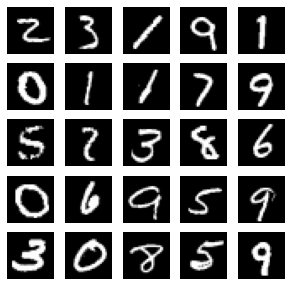

In [19]:
# Plot 25 mnist digits samples from train dataset
index = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[index]
labels = y_train[index]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))

for i in range(len(index)):
    plt.subplot(5, 5, i + 1)  # nrows, ncols, index
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

## Train CNN Model

### Preprocess

In [20]:
# Scale images to the [0, 1] range
x_train_scaled = x_train.astype("float32") / 255
x_test_scaled = x_test.astype("float32") / 255

print("======BEFORE======")
print("x_train shape: \n", x_train_scaled.shape, sep = '')
print("train samples", x_train_scaled.shape[0])
print("test samples", x_test_scaled.shape[0])

# Make sure images have shape (28, 28, 1)
x_train_scaled = np.expand_dims(x_train_scaled, -1)
x_test_scaled = np.expand_dims(x_test_scaled, -1)

print("======AFTER======")
print("x_train shape: \n", x_train_scaled.shape, sep = '')
print("train samples", x_train_scaled.shape[0])
print("test samples", x_test_scaled.shape[0])

======BEFORE======
x_train shape: 
(60000, 28, 28)
train samples 60000
test samples 10000
======AFTER======
x_train shape: 
(60000, 28, 28, 1)
train samples 60000
test samples 10000


In [21]:
# MNIST Class & Input Shape
classes = list(range(10))
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [23]:
# model compile
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### TRAIN

In [24]:
x_train_scaled.shape

(60000, 28, 28, 1)

In [25]:
# hyperparameter
batch_size = 128
epochs = 50

In [26]:
# train
model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 8s 19ms/step - loss: 0.3304 - accuracy: 0.9012 - val_loss: 0.0749 - val_accuracy: 0.9793
Epoch 2/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0931 - accuracy: 0.9710 - val_loss: 0.0547 - val_accuracy: 0.9855
Epoch 3/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 4/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 5/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0469 - val_accuracy: 0.9858
Epoch 6/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0387 - val_accuracy: 0.9895
Epoch 7/50
422/422 [==============================] - 8s 18ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0342 - val_accuracy: 0.9900

In [27]:
# check model
score = model.evaluate(x_test_scaled, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9925
Test loss: 0.03027423657476902
Test accuracy: 0.9925000071525574


## Make Inference Image
- Make inference image as requested

In [51]:
from einops import rearrange

In [52]:
num_samples = 16

In [53]:
x_infer = rearrange(x_test, '(a b) c d -> a b c d', b=num_samples)
x_infer.shape

(625, 16, 28, 28)

In [54]:
y_infer = rearrange(y_test, '(a b) c -> a b c', b=num_samples)
y_infer.shape

(625, 16, 10)

In [55]:
def concat_h(im1, im2):
    concat = np.concatenate((im1, im2), axis=1)
    return concat

def concat_v(im1, im2):
    concat = np.concatenate((im1, im2), axis=0)
    return concat

In [56]:
# concatenate images
x_infer_concat = []

for i in range(x_infer.shape[0]):
    # get batch
    imgs = x_infer[i]
      
    for j in range(len(imgs)):
        if j < 4: #first row
            if j == 0:
                img1 = imgs[j]
            else:
                img1=concat_h(img1, imgs[j])
        elif j < 8: #second row
            if j == 4:
                img2 = imgs[j]
            else:
                img2=concat_h(img2, imgs[j])
        elif j < 12: #third row
            if j == 8:
                img3 = imgs[j]
            else:
                img3=concat_h(img3, imgs[j])
        else: #fourth row
            if j == 12:
                img4 = imgs[j]
            else:
                img4=concat_h(img4, imgs[j])

    # concat all
    tmp_x_infer = img1
    tmp_x_infer = concat_v(tmp_x_infer, img2)
    tmp_x_infer = concat_v(tmp_x_infer, img3)
    tmp_x_infer = concat_v(tmp_x_infer, img4)
    
    x_infer_concat.append(tmp_x_infer)

x_infer_concat = np.array(x_infer_concat)

In [57]:
x_infer_concat.shape

(625, 112, 112)

In [58]:
np.argmax(y_infer[0], axis =1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5])

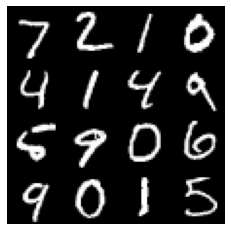

In [59]:
plt.figure(figsize=(4,4))

image = x_infer_concat[0]
plt.imshow(image, cmap='gray')
plt.axis('off')
    
plt.show()
plt.close('all')

In [60]:
image = x_infer_concat[0]

x_coords = [0, 28, 56, 84]
y_coords = [0, 28, 56, 84]

prediction = []

for y in y_coords:
    for x in x_coords:
        # preprocess
        tmp_image = image[y:y+28, x:x+28]
        tmp_image = tmp_image.astype("float32")/255

        # match dims
        tmp_image = np.expand_dims(tmp_image, axis=0)
        tmp_image = np.expand_dims(tmp_image, axis=-1)
        
        # predict
        pred = np.argmax(model.predict(tmp_image))
        prediction.append(pred)

prediction

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]

In [61]:
x_coords = [0, 28, 56, 84]
y_coords = [0, 28, 56, 84]
coords = []

for y in y_coords:
    for x in x_coords:
        coords.append((y,x))

print(coords)

[(0, 0), (0, 28), (0, 56), (0, 84), (28, 0), (28, 28), (28, 56), (28, 84), (56, 0), (56, 28), (56, 56), (56, 84), (84, 0), (84, 28), (84, 56), (84, 84)]


In [62]:
def class_pred_loc(image, target):
    prediction = []
    viz = []
    
    for y, x in coords:
        # preprocess
        tmp_image = image[y:y+28, x:x+28]
        tmp_image = tmp_image.astype("float32")/255

        # match dims
        tmp_image = np.expand_dims(tmp_image, axis=0)
        tmp_image = np.expand_dims(tmp_image, axis=-1)

        # predict
        pred = np.argmax(model.predict(tmp_image))
        
        if pred == target:
            viz.append((y, x))
            
        prediction.append(pred)

    return prediction, viz

In [63]:
def viz_image(image, viz):
    rect = []
    for y,x in viz:
        rect.append((x,y,28,28))
    
    plt.figure(figsize=(4,4))

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    ax = plt.gca()
    
    for (x, y, w, h) in rect:
        ax.add_patch(
            patches.Rectangle(
                (x, y), w, h,
                edgecolor='red',
                facecolor='none',
                linewidth=2,
                fill=True))

    plt.show()
    plt.close('all')

In [64]:
def number_detector(image, target):
    prediction, viz = class_pred_loc(image, target)
    viz_image(image, viz)
    print('Predicted Class : ')
    print(prediction)

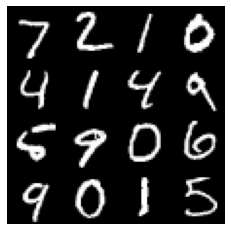

In [65]:
plt.figure(figsize=(4,4))

image = x_infer_concat[0]
plt.imshow(image, cmap='gray')
plt.axis('off')
    
plt.show()
plt.close('all')

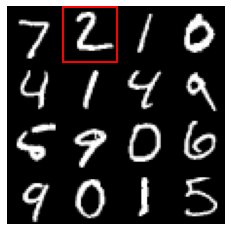

Predicted Class : 
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]


In [66]:
number_detector(image, 2)

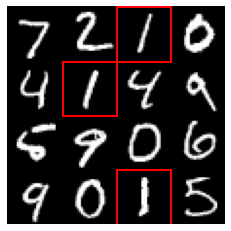

Predicted Class : 
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]


In [67]:
number_detector(image, 1)

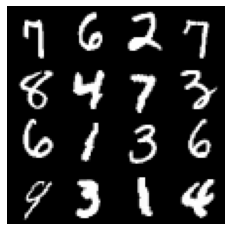

In [68]:
plt.figure(figsize=(4,4))

image = x_infer_concat[5]
plt.imshow(image, cmap='gray')
plt.axis('off')
    
plt.show()
plt.close('all')

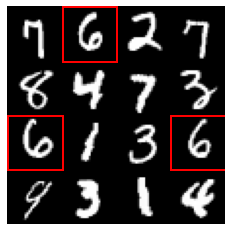

Predicted Class : 
[7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4]


In [69]:
number_detector(image, 6)

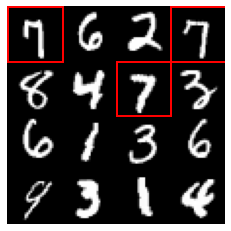

Predicted Class : 
[7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4]


In [71]:
number_detector(image, 7)

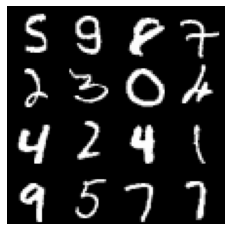

In [72]:
plt.figure(figsize=(4,4))

image = x_infer_concat[15]
plt.imshow(image, cmap='gray')
plt.axis('off')
    
plt.show()
plt.close('all')

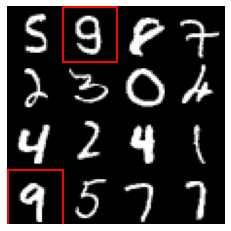

Predicted Class : 
[5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7]


In [73]:
number_detector(image, 9)

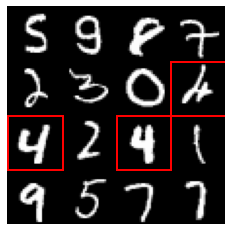

Predicted Class : 
[5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7]


In [74]:
number_detector(image, 4)